In [1]:
import glob
import os 
import densmap as dm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [14]:
# Exploration parameters
a = 1.0
n = 6
ca = 0.05

In [15]:
workdir = 'WorkdirRoughMeniscus/'
file_root = 'flow_'

In [16]:
# Input and output files
a_tag = str(a).replace('.','').ljust(2,'0')
n_tag = str(n).rjust(2,'0')
c_tag = str(10*ca).replace('.','').ljust(3,'0')
file_tag = 'N'+n_tag+'A'+a_tag+'C'+c_tag
folder_name = workdir+file_tag+'/'

In [17]:
Lx = 82.80000
Lz = 28.00000
Lx4 = Lx/4
waven  = 2*np.pi*n/Lx4
height = a/waven
phi_0  = 0
h_0    = 3.0
fun_sub = lambda x : height * np.sin(waven*x+phi_0) + h_0

In [18]:
# Automagically finding the index of the first and last file
dat_file_list = sorted([os.path.basename(x) for x in glob.glob(folder_name+'*.dat')])
n_init = int(dat_file_list[0][5:10].lstrip("0"))
n_fin = int(dat_file_list[-1][5:10].lstrip("0"))

In [19]:
# Creating the meshgrid
density_array = dm.read_density_file(folder_name+'/'+file_root+'00001.dat', bin='y')
Nx = density_array.shape[0]
Nz = density_array.shape[1]
hx = Lx/Nx
hz = Lz/Nz
x = hx*np.arange(0.0,Nx,1.0, dtype=float)+0.5*hx
z = hz*np.arange(0.0,Nz,1.0, dtype=float)+0.5*hz
X, Z = np.meshgrid(x, z, sparse=False, indexing='ij')

In [20]:
z_min = 5
z_max = 15
z_ref = 10

In [21]:
# INITIALIZATION
xc = np.sum(np.multiply(density_array[:,int(z_ref//hz)+1],x))/np.sum(density_array[:,int(z_ref//hz)+1])
dxc = 0.5*Lx-xc
density_array = np.roll(density_array, shift=int(dxc//hx), axis=0)
left_int, right_int = dm.detect_interface_loc(density_array, hx, hz, z_min, z_max, wall='l')

(-1.3877787807814457e-17, 82.79999999999998, -1.3877787807814457e-17, 28.0)

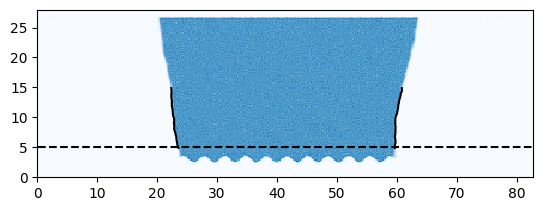

In [22]:
%matplotlib inline
plt.pcolormesh(X, Z, density_array, cmap=cm.Blues, vmax=1000)
plt.plot([x[0],x[-1]],[z_min,z_min],'k--')
plt.plot(left_int[0],left_int[1],'k-')
plt.plot(right_int[0],right_int[1],'k-')
plt.axis('scaled')

In [23]:
dt = 12.5
delta_th = 2.0
t = []
xcom = []
lcl = []
rcl = []

Obtainig frame 50
23.40102963551233 | 41.65033769585604 | 59.71339798396636
Obtainig frame 100
23.660554094555252 | 41.99442409609557 | 59.92989712038299
Obtainig frame 150
23.931166563136582 | 42.8065659996029 | 60.57756432394328
Obtainig frame 200
24.286181546467954 | 43.50811158974681 | 62.77066415236675
Obtainig frame 250
23.419447055421294 | 43.17630277370136 | 62.64874857621586
Obtainig frame 300
22.341954504743846 | 43.48924889016584 | 63.30890326684179
Obtainig frame 350
22.36571524734138 | 43.62630343324212 | 63.72079338886862
Obtainig frame 400
22.47069833354071 | 43.85705918497395 | 63.75434680943582
Obtainig frame 450
22.432466134010102 | 43.92038653896011 | 63.73837282847458
Obtainig frame 500
22.607295384187143 | 44.43001308347172 | 64.05656227068893
Obtainig frame 550
22.27291491509492 | 44.214942950746234 | 63.585908894373894
Obtainig frame 600
22.262622692391286 | 43.9188680733681 | 63.599467791151376
Obtainig frame 650
21.717642889925635 | 43.40255659255062 | 63.04036

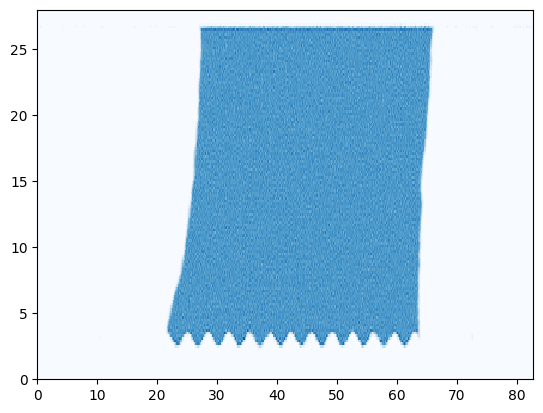

In [24]:
%matplotlib inline
n_dump = 50
for idx in range(n_init, n_fin+1):
    if idx%n_dump==0 :
        print("Obtainig frame "+str(idx))
    density_array = dm.read_density_file(folder_name+'/'+file_root+'{:05d}'.format(idx)+'.dat', bin='y')
    density_array = np.roll(density_array, shift=int(dxc//hx), axis=0)
    xc = np.sum(np.multiply(density_array[:,int(z_ref//hz)+1],x))/np.sum(density_array[:,int(z_ref//hz)+1])
    dxc = 0.5*Lx-xc
    # density_array = np.roll(density_array, shift=int(dxc//hx), axis=0)
    left_int, right_int = dm.detect_interface_loc(density_array, hx, hz, z_min, z_max, wall='l')
    if idx%n_dump==0 :
        print(left_int[0][0],'|',xc,'|',right_int[0][0])
    t.append((1e-3)*idx*dt)
    xcom.append(xc)
    lcl.append(left_int[0][0])
    rcl.append(right_int[0][0])
plt.pcolormesh(X, Z, density_array, cmap=cm.Blues, vmax=1000)

<IPython.core.display.Javascript object>


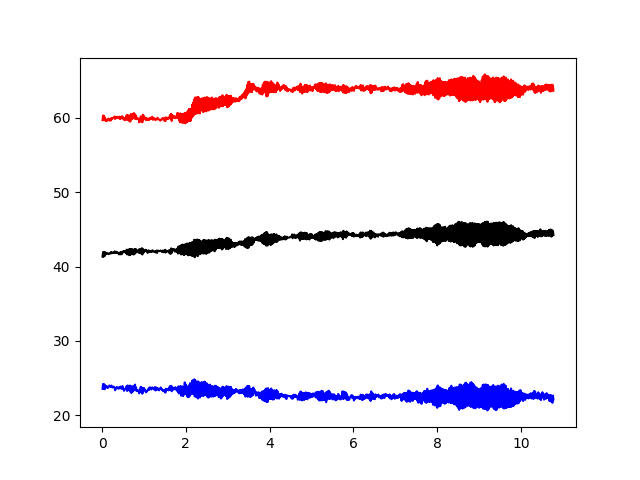

In [25]:
%matplotlib notebook
plt.plot(t,xcom,'k-')
plt.plot(t,lcl,'b-')
plt.plot(t,rcl,'r-')